In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="QX4y4EI327HVZJ8Vio1d")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-6 in yolov8:: 100%|██████████| 1452/1452 [00:00<00:00, 3466.13it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO
import os

# Load YOLOv8 nano (fast)
model = YOLO("yolov8n.pt")

# path to dataset configuration file
data_yaml = os.path.join(dataset.location, "data.yaml")
print("Using:", data_yaml)

# train
results = model.train(
    data=data_yaml,
    imgsz=640,
    epochs=50,
    batch=16,
    name="asl_yolov8",
    project="runs_asl"
)

Using: /content/American-Sign-Language-Letters-6/data.yaml
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/American-Sign-Language-Letters-6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=asl_yolov8, nbs=64, nms=False, opset=None, optimize=Fals

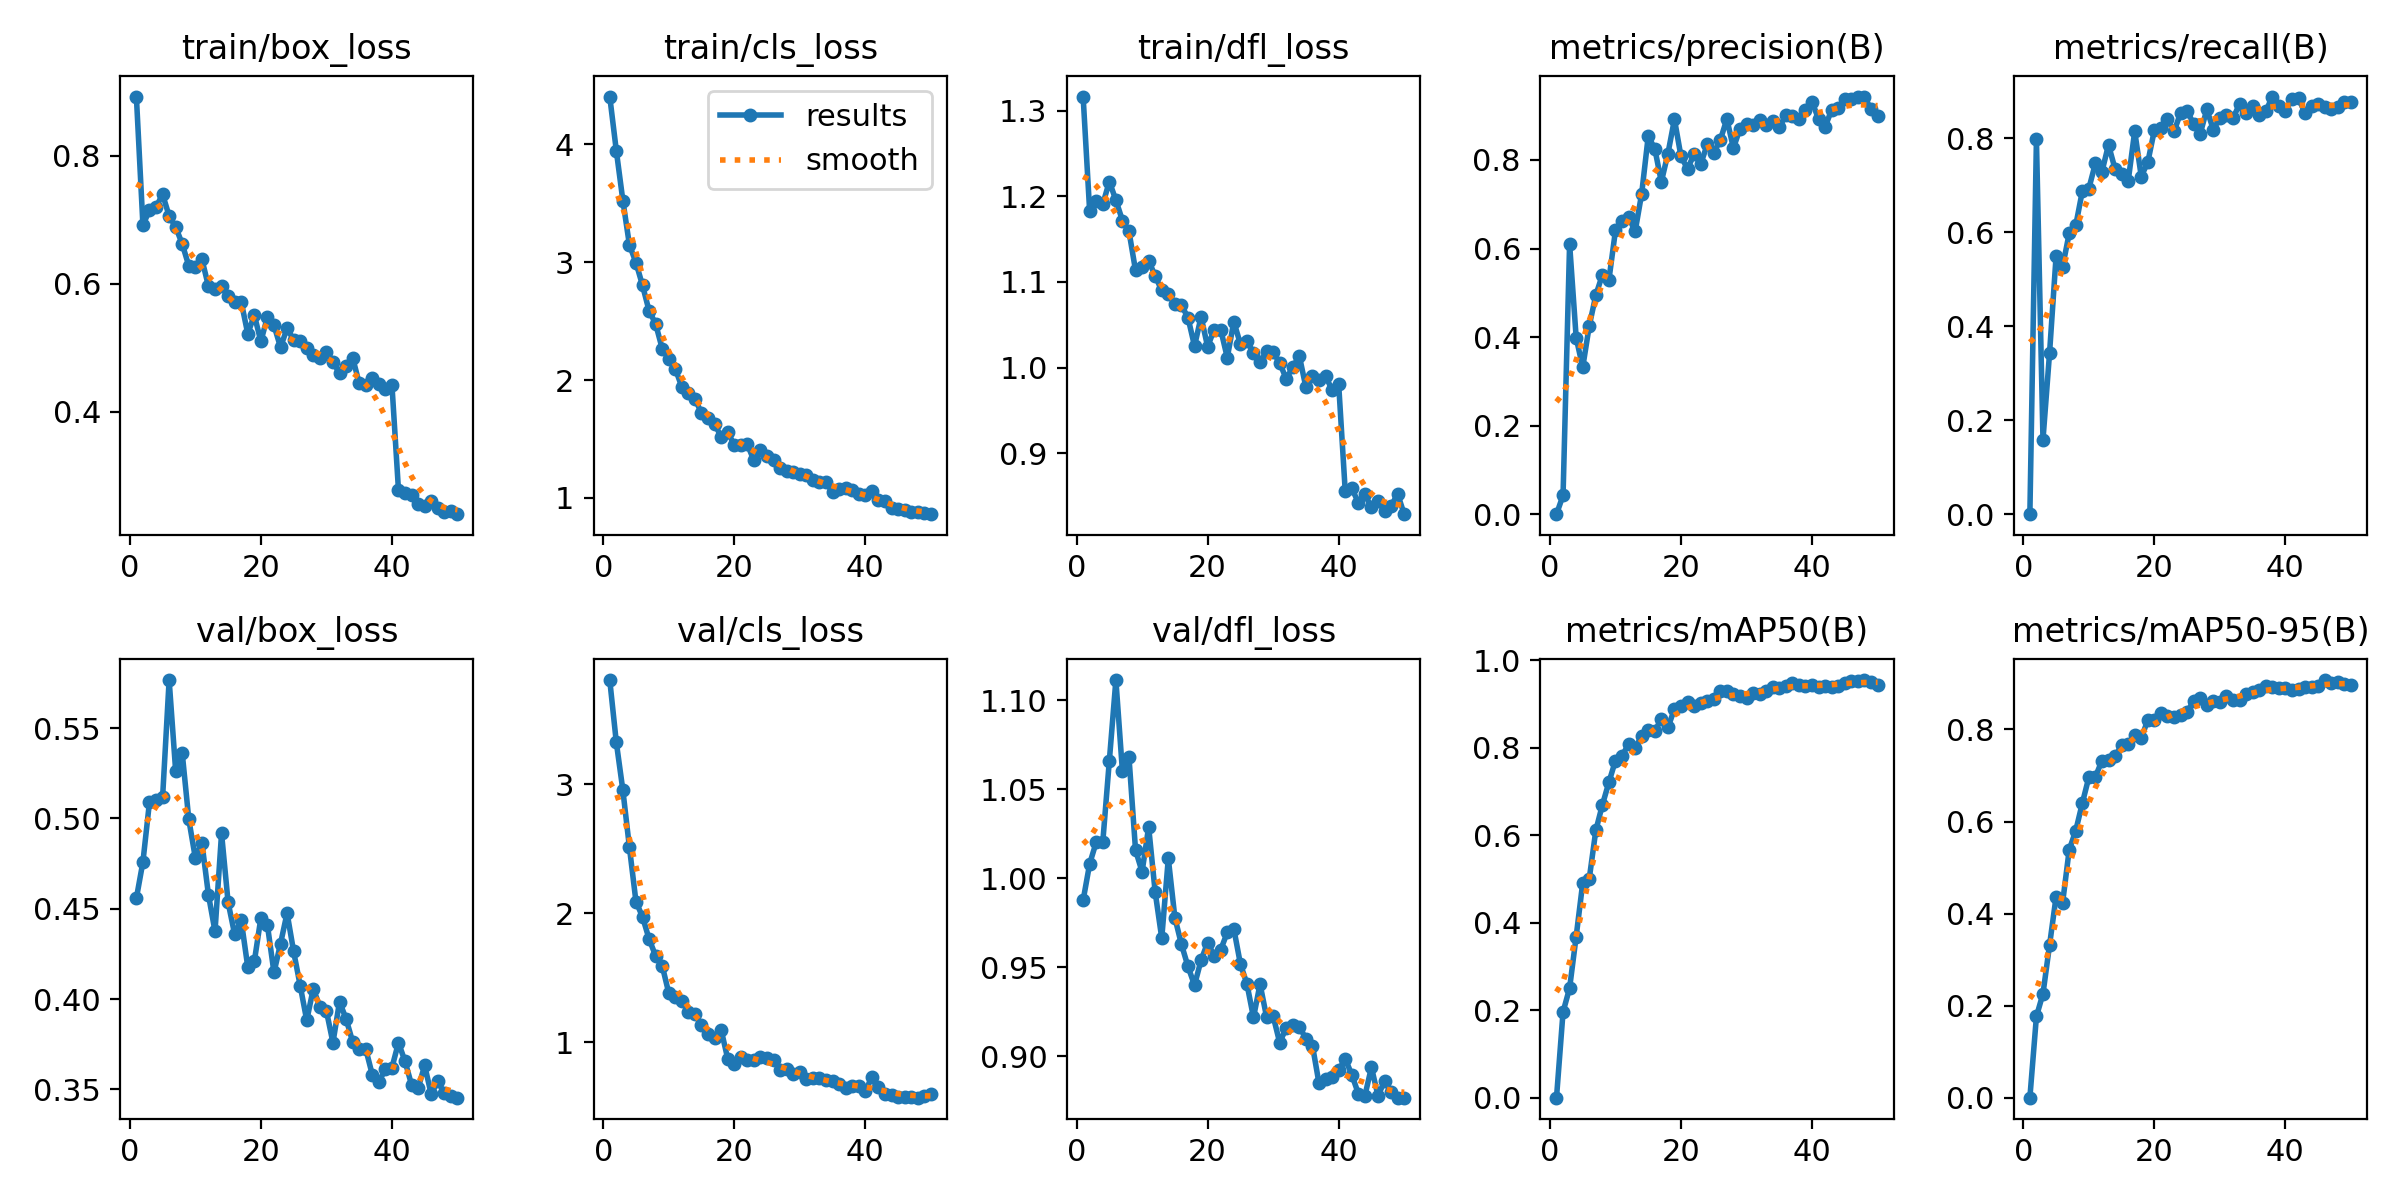

In [4]:
from IPython.display import Image, display
import os

exp_dir = results.save_dir
display(Image(filename=os.path.join(exp_dir, "results.png")))

In [5]:
best = os.path.join(exp_dir, "weights", "best.pt")
model = YOLO(best)

val_dir = os.path.join(dataset.location, "valid", "images")

preds = model.predict(
    source=val_dir,
    conf=0.5,
    save=True,
    project="runs_asl",
    name="asl_infer"
)

print("Predictions saved to:", preds[0].save_dir)


image 1/144 /content/American-Sign-Language-Letters-6/valid/images/A10_jpg.rf.85a1d5108a4be1e892ed2d1eab546db9.jpg: 640x480 1 A, 59.2ms
image 2/144 /content/American-Sign-Language-Letters-6/valid/images/A14_jpg.rf.697ab3407fef64a79a881ef996e69403.jpg: 640x480 1 T, 10.3ms
image 3/144 /content/American-Sign-Language-Letters-6/valid/images/A20_jpg.rf.6a301a9d25bebfe2968170fcaa3705f3.jpg: 640x480 1 A, 8.5ms
image 4/144 /content/American-Sign-Language-Letters-6/valid/images/A3_jpg.rf.9067f940effa67b93d38fdcf53770055.jpg: 640x480 1 A, 9.1ms
image 5/144 /content/American-Sign-Language-Letters-6/valid/images/A9_jpg.rf.35b6a0735e0ff6acc94df948b5314389.jpg: 640x480 1 A, 8.1ms
image 6/144 /content/American-Sign-Language-Letters-6/valid/images/B0_jpg.rf.6257f63c7d858d792f9c738779912785.jpg: 640x480 1 B, 8.3ms
image 7/144 /content/American-Sign-Language-Letters-6/valid/images/B10_jpg.rf.52ac4cb9914a1806e975408bea93e779.jpg: 640x480 1 B, 8.1ms
image 8/144 /content/American-Sign-Language-Letters-6/v


image 1/1 /content/American-Sign-Language-Letters-6/valid/images/A10_jpg.rf.85a1d5108a4be1e892ed2d1eab546db9.jpg: 640x480 1 A, 6.7ms
Speed: 2.7ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


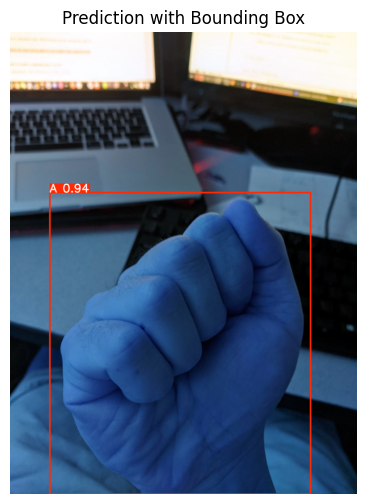

In [6]:
import matplotlib.pyplot as plt

# load best model from training
best = os.path.join(exp_dir, "weights", "best.pt")
model = YOLO(best)

# pick one image from the validation set
val_dir = os.path.join(dataset.location, "valid", "images")
example_image = sorted(os.listdir(val_dir))[0]   # first image
img_path = os.path.join(val_dir, example_image)

# run prediction (no saving, just display)
result = model.predict(source=img_path, conf=0.5, save=False)[0]

plt.figure(figsize=(6,6))
plt.imshow(result.plot())   # YOLO draws boxes + labels
plt.axis("off")
plt.title("Prediction with Bounding Box")
plt.show()